In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
sales_data = pd.read_excel('Sales data for scenario analysis v3.xlsx', sheet_name='Sheet2')
lat_long_district = pd.read_csv('Lat_Long_Details.csv')

#read in district 2015
crop_health_2015 = pd.read_csv('ReportDistricts2015.csv')

C:\Users\sharan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
sales_data.drop(sales_data.columns[[0]], axis=1, inplace=True)
sales_data = sales_data.fillna(0)
sales_data.rename(columns={'Calendar Year/Month': "Product",'Unnamed: 4':'longitude', 'Unnamed: 5':'latitude', 'Unnamed: 6': 'Product Code', 'Unnamed: 3': 'Pincode', 'Unnamed: 2':"SAP Code"}, inplace=True)
sales_data["latitude"][2] = 0
sales_data["longitude"][1] = 0
sales_data["longitude"] [2] = 0
sales_data["latitude"] = sales_data["latitude"].astype(float)
sales_data["longitude"] = sales_data["longitude"].astype(float)
sales_data = sales_data.merge(lat_long_district, how='left')
sales_data = sales_data.fillna(0)
del sales_data["id"]
del sales_data['Unnamed: 1']
sales_data = sales_data.iloc[3:]

In [130]:
#helper functions 
def monthly_avg(df):
    for i in range(0,12):
        curr_month = str(i+1) + "_avg"
        df[curr_month] = (df["d"+str(i+1)]+df["d"+str(i+2)]+df["d"+str(i+3)])/3
        #print("done")
        
def get_change(df):
    for i in range(1,12):
        change_month = str(i+1) + "_change"
        df[change_month] = df[str(i+1)+"_avg"]-df[str(i)+'_avg']
        #print("done change")
        
def get_change_sum_only(df,year):
    y = str(year)
    for i in range(1,12):
        change_month = str(i+1) + "_change"
        if i>9:
            df[change_month] = df[str(i+1)+"."+y]-df[str(i)+"."+y]
            #print(i)
        elif i ==9:
            df[change_month] = df[str(i+1)+"."+y]-df["0"+str(i)+"."+y]
        else:
            df[change_month] = df["0"+str(i+1)+"."+y]-df["0"+str(i)+"."+y]  
    return df

In [143]:
def plot_year_area(year, area):
    columns = []
    for i in range(0,12):
        if i <9:
            columns.append("0"+ str(i+1)+"."+str(year))
        else:
            columns.append(str(i+1)+"."+str(year))
    
    columns.append("District")
    sales_year = sales_data[columns]
    #print(sales_year.head())
    sales_area = sales_year.loc[sales_year['District'] == area]
    
    sum_sales_area = sales_area.sum(axis = 0, numeric_only= False) 
    #print(sum_sales_area.head())
    sum_sales_area = get_change_sum_only(sum_sales_area,year)
    #print(sum_sales_area)
    
    #working fine above this 
    crop_heath_name = 'ReportDistricts' + str(year) + '.csv'
    crop_health_input = pd.read_csv(crop_heath_name)
    
    monthly_avg(crop_health_input)
    get_change(crop_health_input)
    
    #plot for change in total amt of product bought and change in avg of the crop health month wise 
    crop_health_area_year = crop_health_input.loc[crop_health_input['districtName'] == area]
    np_crop_health_area_year = np.array(list(crop_health_area_year.values.ravel()[-11:]), dtype=np.float)

    np_sales_sum_change = np.array(list(sum_sales_area.values[-11:]),  dtype=np.float)

    df_plot = pd.DataFrame(np_crop_health_area_year, columns = ["health"])
    df_plot['sales'] = pd.Series(np_sales_sum_change, index=df_plot.index)
    
    
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax2 = ax.twinx() 

    width = 0.4

    df_plot.health.plot(kind='bar', color='red', ax=ax, width=width, position=1)
    
    df_plot.sales.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
    title = "Year: " + str(year) + ' in District: '+ str(area) 
    
    ax.set_ylabel('Health')
    ax2.set_ylabel('Sales Sum')
    plt.title(title)
    plt.legend()
    plt.show()

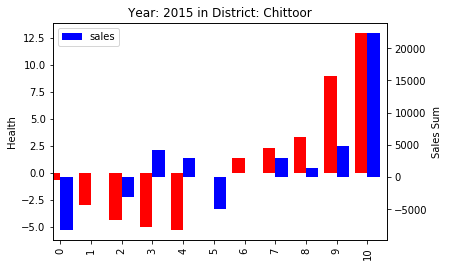

In [144]:
plot_year_area(2015,"Chittoor")

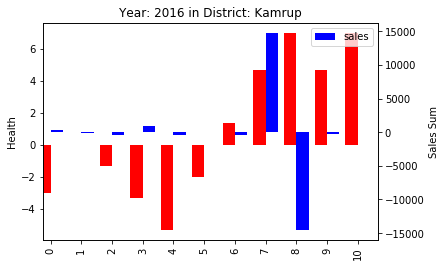

In [138]:
plot_year_area(2016,"Kamrup")

In [152]:
np.unique(lat_long_district.District.values)

array(['Alipurduar', 'Baksa', 'Bankura', 'Barddhaman', 'Birbhum',
       'Bongaigaon', 'Cachar', 'Changlang', 'Chittoor', 'Dakshin Dinajpur',
       'Darjiling', 'Darrang', 'Dibrugarh', 'East Godavari',
       'East Khasi Hills', 'East Siang', 'Goalpara', 'Golaghat', 'Guntur',
       'Haora', 'Hugli', 'Imphal East', 'Jalpaiguri', 'Jorhat', 'Kamrup',
       'Karbi Anglong', 'Koch Bihar', 'Krishna', 'Maldah', 'Morigaon',
       'Murshidabad', 'Nadia', 'Nellore', 'North 24 Parganas',
       'Pashchim Medinipur', 'Prakasam', 'Purba Medinipur', 'Puruliya',
       'Ri Bhoi', 'Sivasagar', 'Sonitpur', 'South 24 Parganas',
       'Srikakulam', 'Uttar Dinajpur', 'Visakhapatnam', 'Vizianagaram',
       'West Godavari', 'West Tripura'], dtype=object)

In [167]:
#statewise breakup
states = np.unique(lat_long_district.State.values)

In [178]:
states

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Manipur',
       'Meghalaya', 'Tripura', 'West Bengal'], dtype=object)

In [168]:
for i in states:
    tripura_df = lat_long_district.loc[lat_long_district['State'] == i]
    tripura_districts = np.unique(tripura_df.District.values)
    print(tripura_districts)

['Chittoor' 'East Godavari' 'Guntur' 'Krishna' 'Nellore' 'Prakasam'
 'Srikakulam' 'Visakhapatnam' 'Vizianagaram' 'West Godavari']
['Changlang' 'East Siang']
['Baksa' 'Bongaigaon' 'Cachar' 'Darrang' 'Dibrugarh' 'Goalpara' 'Golaghat'
 'Jorhat' 'Kamrup' 'Karbi Anglong' 'Morigaon' 'Sivasagar' 'Sonitpur']
['Imphal East']
['East Khasi Hills' 'Ri Bhoi']
['West Tripura']
['Alipurduar' 'Bankura' 'Barddhaman' 'Birbhum' 'Dakshin Dinajpur'
 'Darjiling' 'Haora' 'Hugli' 'Jalpaiguri' 'Koch Bihar' 'Maldah'
 'Murshidabad' 'Nadia' 'North 24 Parganas' 'Pashchim Medinipur'
 'Purba Medinipur' 'Puruliya' 'South 24 Parganas' 'Uttar Dinajpur']


In [170]:
meg_df = lat_long_district.loc[lat_long_district['State'] == "Meghalaya"]
meg_districts = np.unique(meg_df.District.values)

State: Meghalaya District: East Khasi Hills


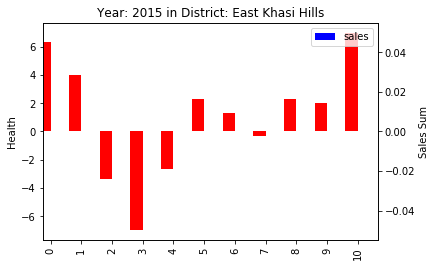

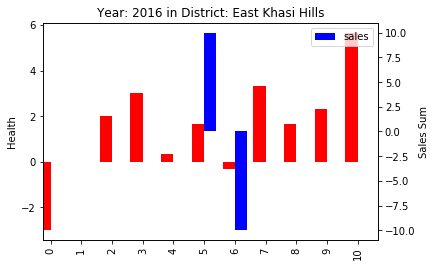

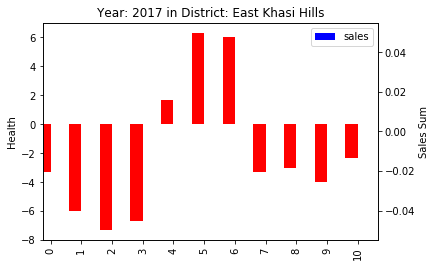

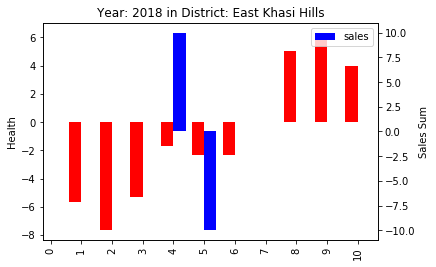

State: Meghalaya District: Ri Bhoi


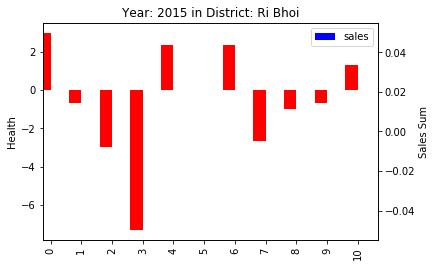

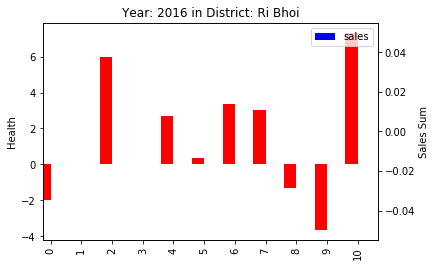

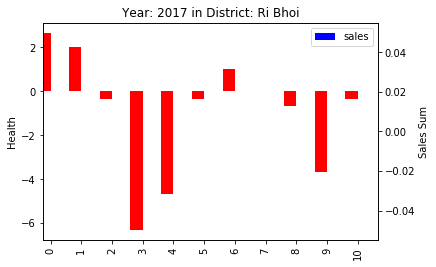

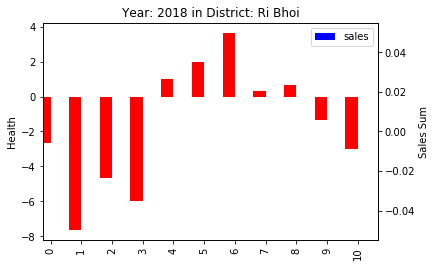

In [172]:
for j in meg_districts:
    first_year = 2015
    print("State: Meghalaya District: "+j)
    for i in range(0,4):
        plot_year_area(first_year,j)
        first_year += 1

In [174]:
ap_df = lat_long_district.loc[lat_long_district['State'] == 'Andhra Pradesh']
ap_districts = np.unique(ap_df.District.values)

State: Andhra Pradesh District: Chittoor


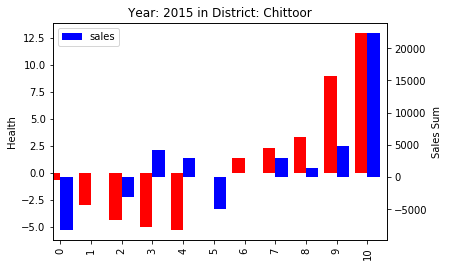

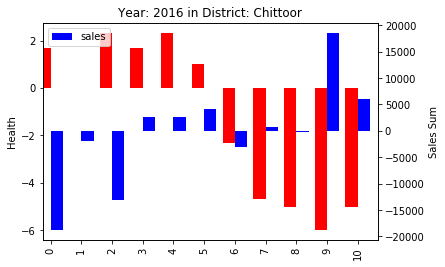

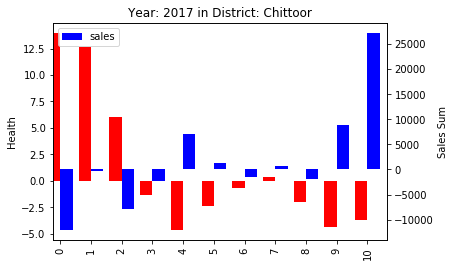

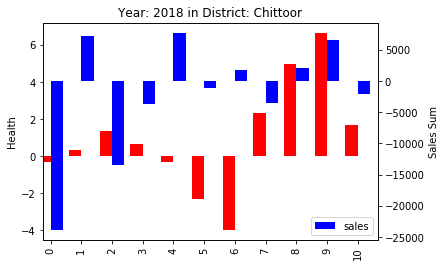

********************************************************************************
State: Andhra Pradesh District: East Godavari


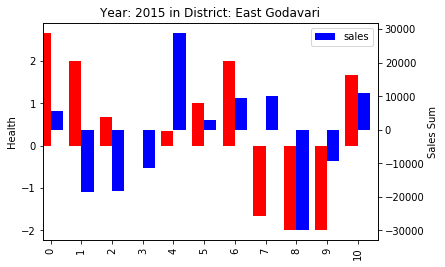

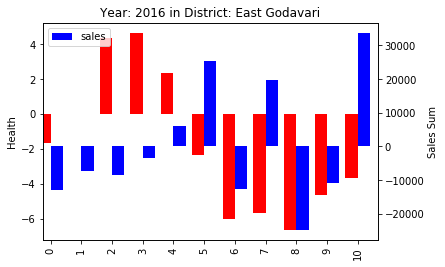

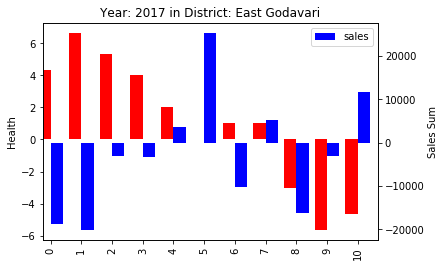

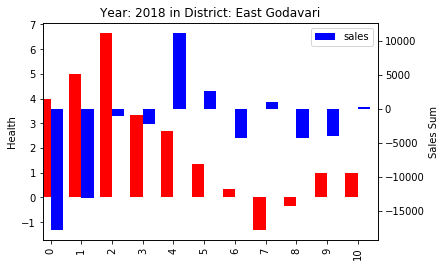

********************************************************************************
State: Andhra Pradesh District: Guntur


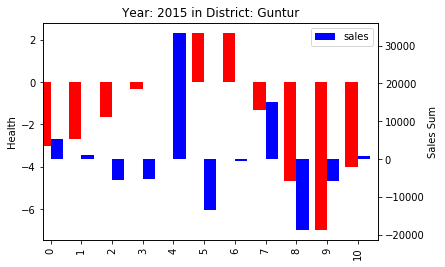

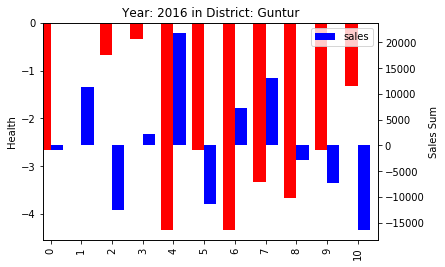

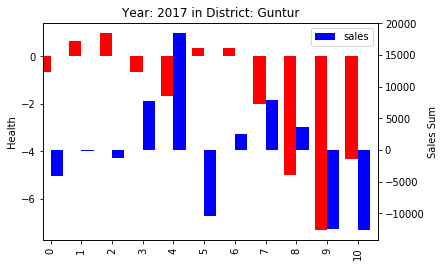

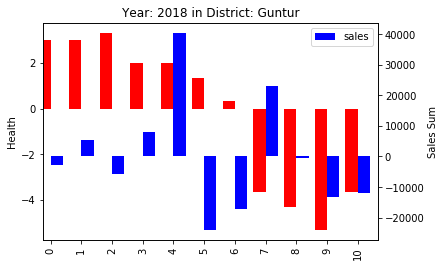

********************************************************************************
State: Andhra Pradesh District: Krishna


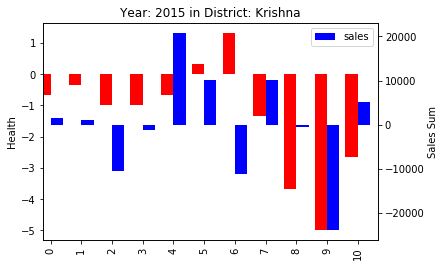

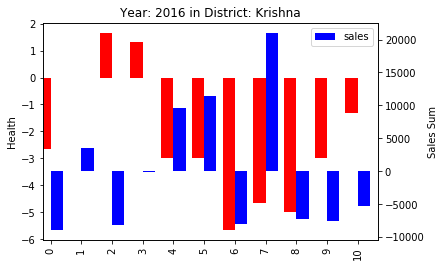

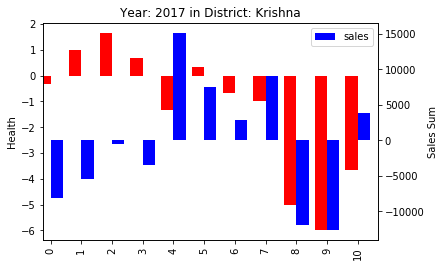

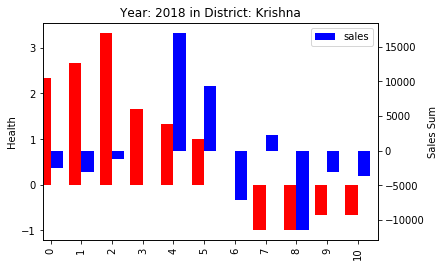

********************************************************************************
State: Andhra Pradesh District: Nellore


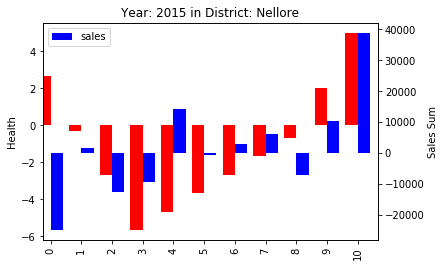

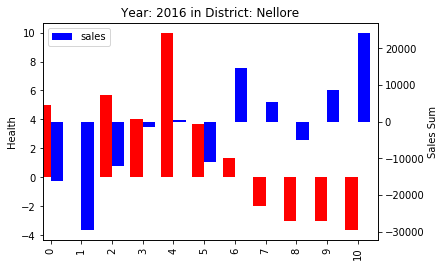

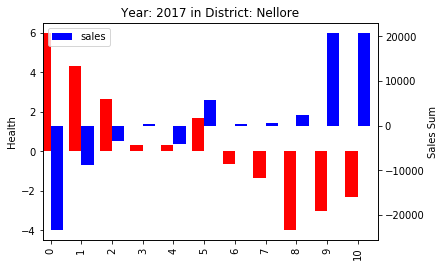

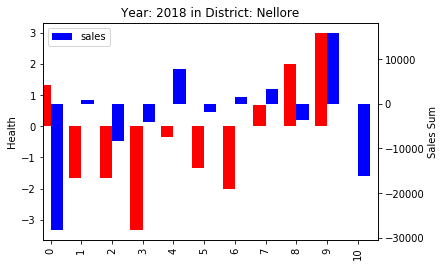

********************************************************************************
State: Andhra Pradesh District: Prakasam


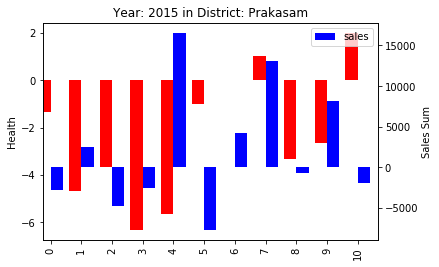

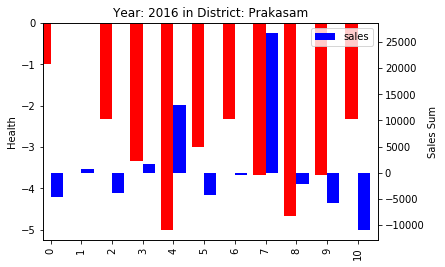

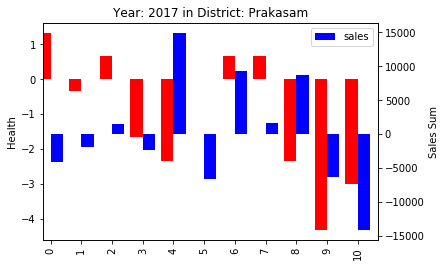

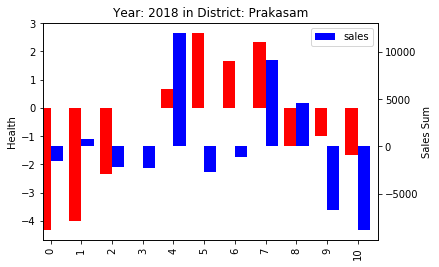

********************************************************************************
State: Andhra Pradesh District: Srikakulam


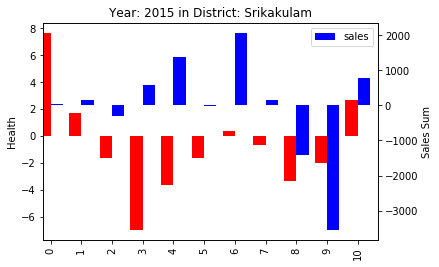

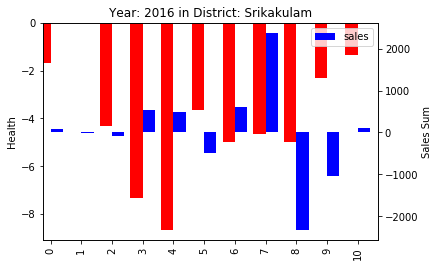

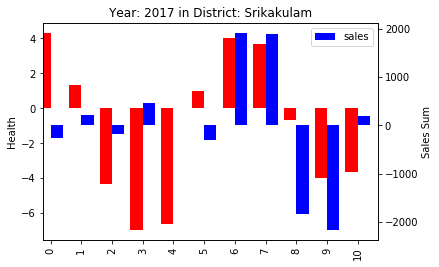

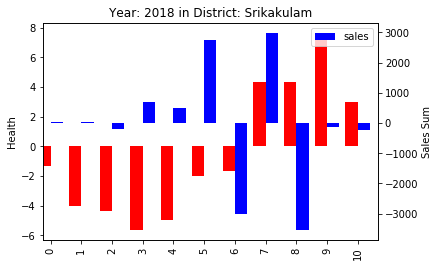

********************************************************************************
State: Andhra Pradesh District: Visakhapatnam


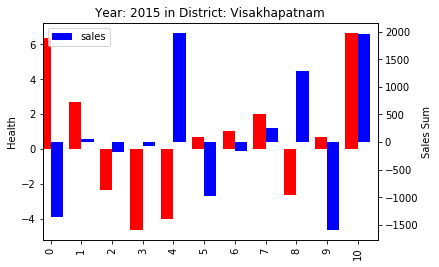

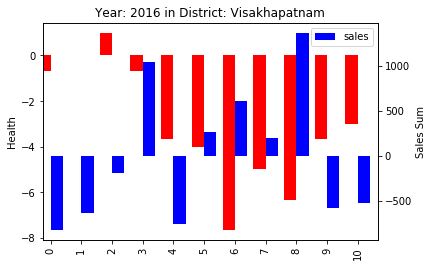

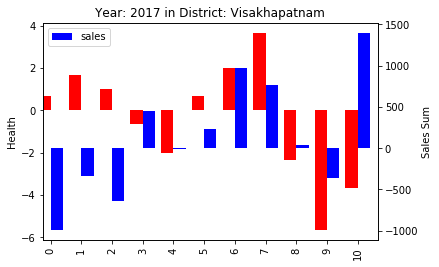

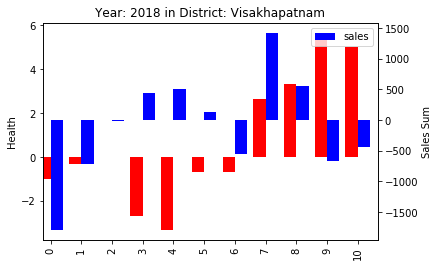

********************************************************************************
State: Andhra Pradesh District: Vizianagaram


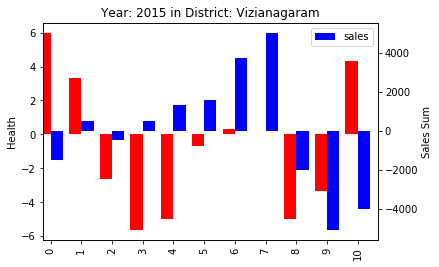

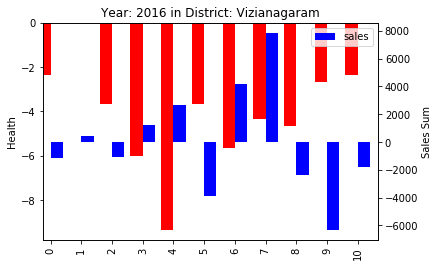

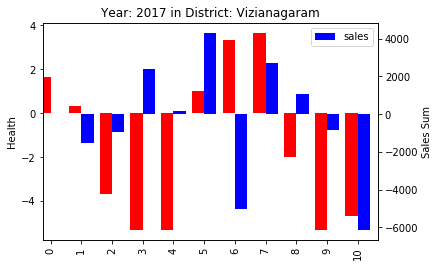

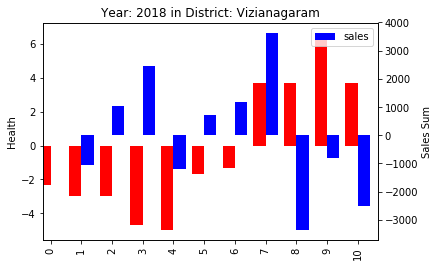

********************************************************************************
State: Andhra Pradesh District: West Godavari


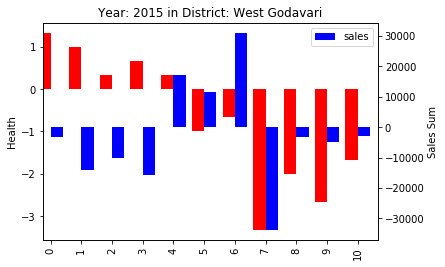

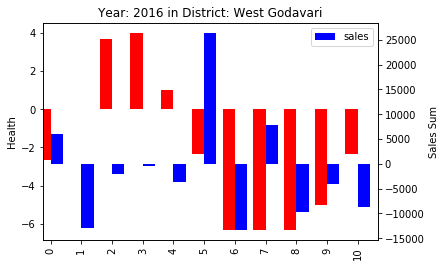

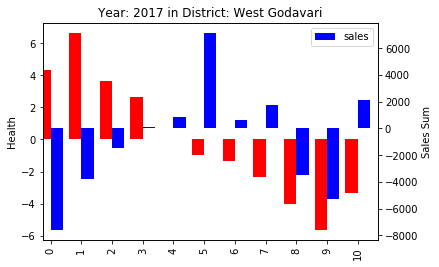

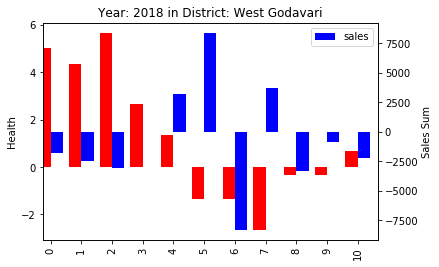

********************************************************************************


In [175]:
for j in ap_districts:
    first_year = 2015
    print("State: Andhra Pradesh District: "+j)
    for i in range(0,4):
        plot_year_area(first_year,j)
        first_year += 1
    print("**"*40)

In [179]:
ar_df = lat_long_district.loc[lat_long_district['State'] == 'West Bengal']
ar_districts = np.unique(ar_df.District.values)

State: West Bengal District: Alipurduar


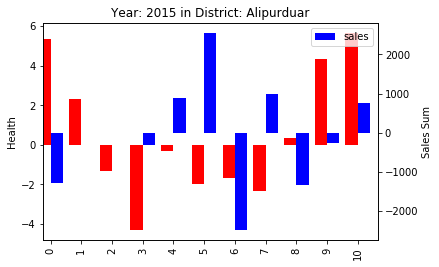

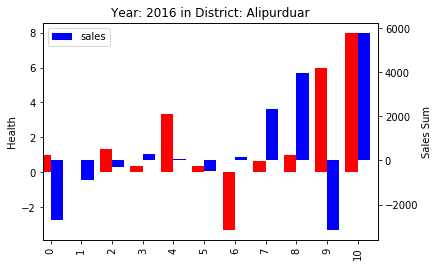

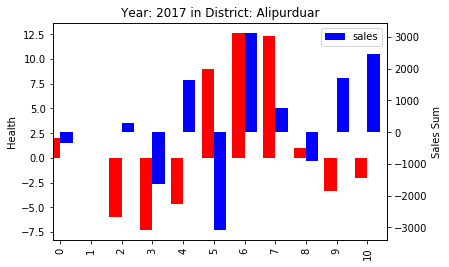

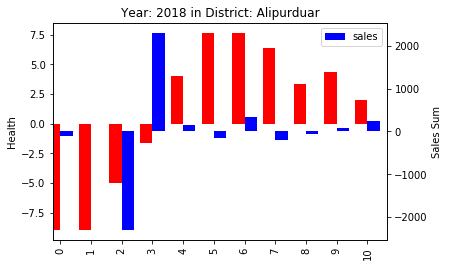

********************************************************************************
State: West Bengal District: Bankura


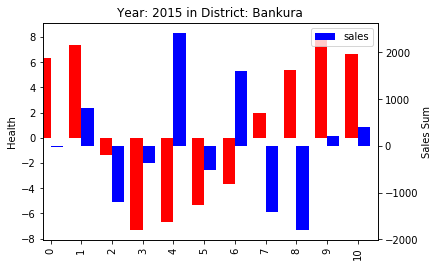

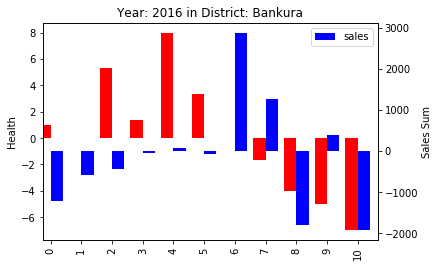

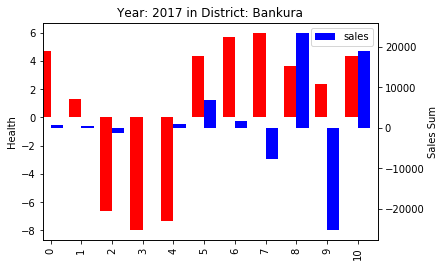

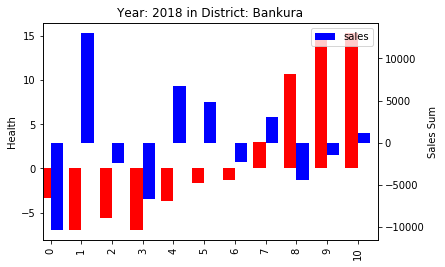

********************************************************************************
State: West Bengal District: Barddhaman


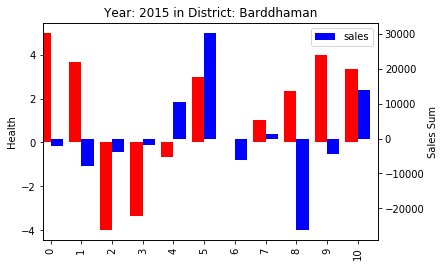

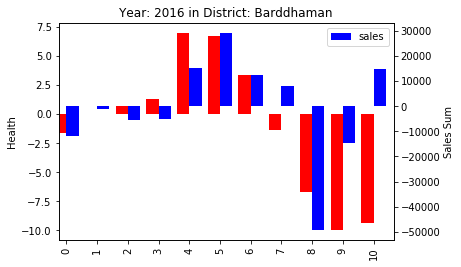

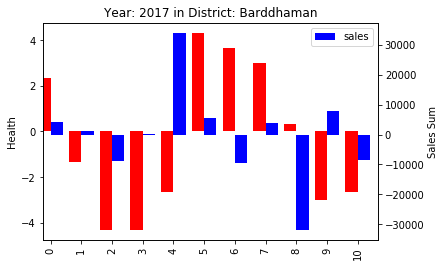

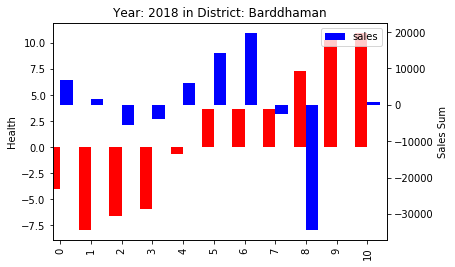

********************************************************************************
State: West Bengal District: Birbhum


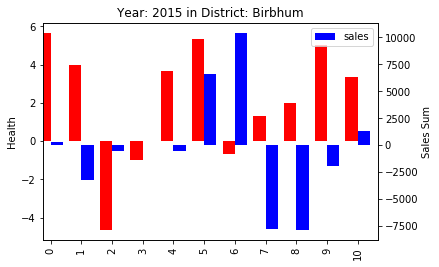

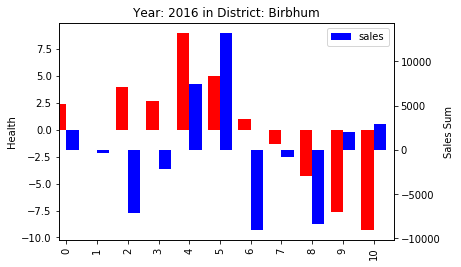

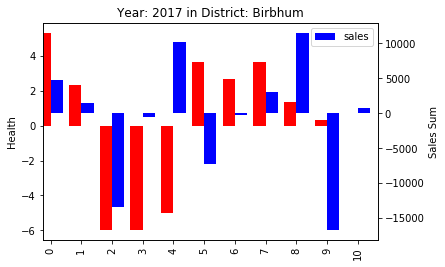

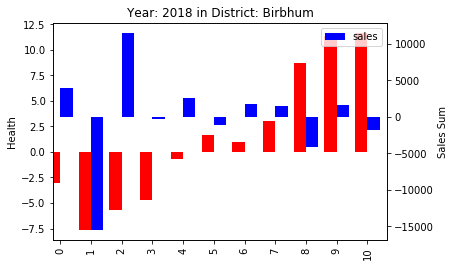

********************************************************************************
State: West Bengal District: Dakshin Dinajpur


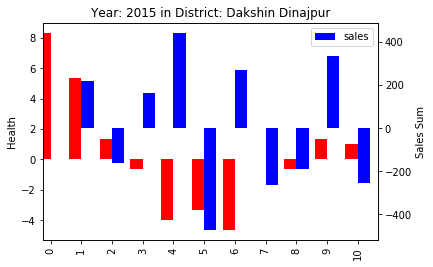

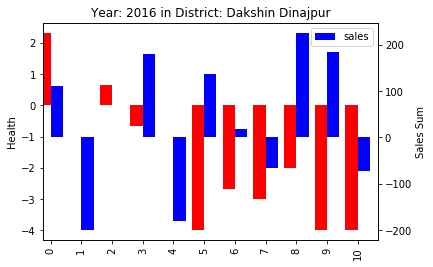

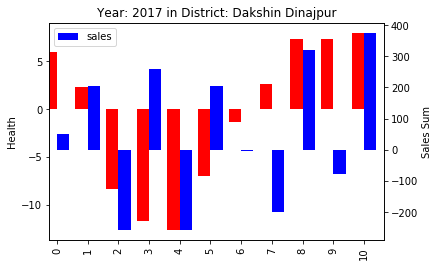

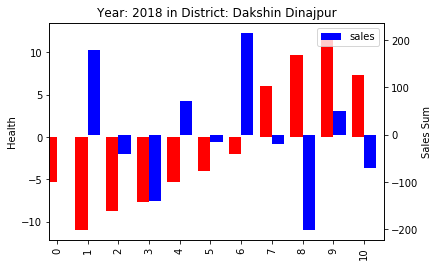

********************************************************************************
State: West Bengal District: Darjiling


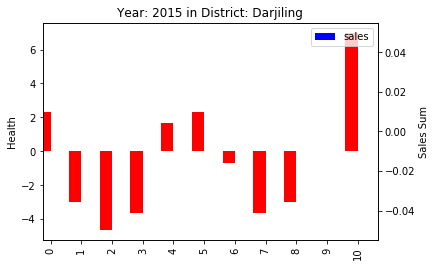

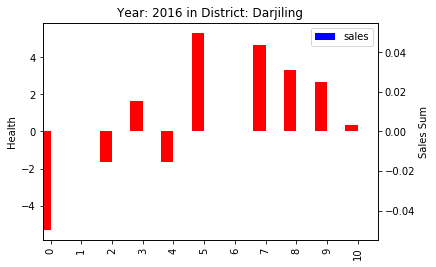

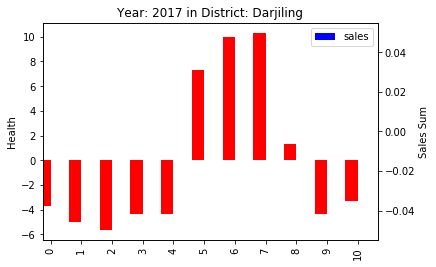

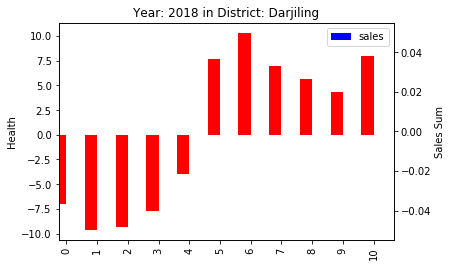

********************************************************************************
State: West Bengal District: Haora


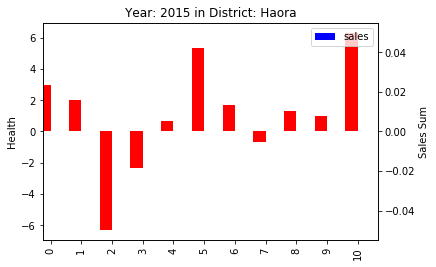

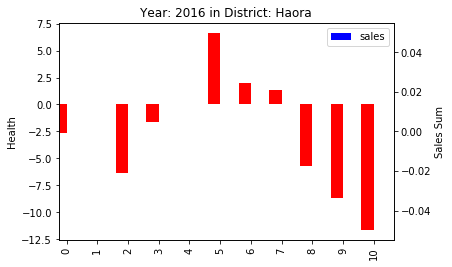

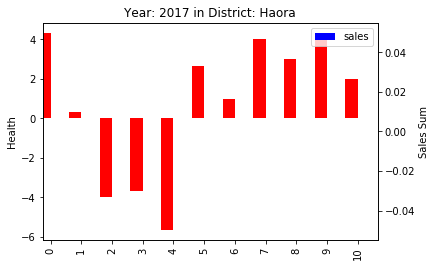

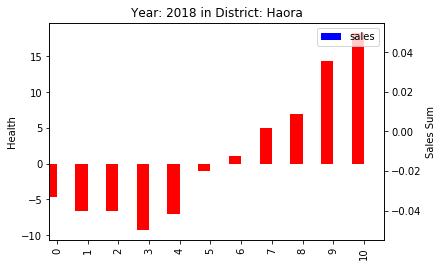

********************************************************************************
State: West Bengal District: Hugli


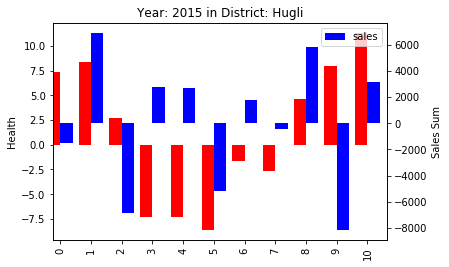

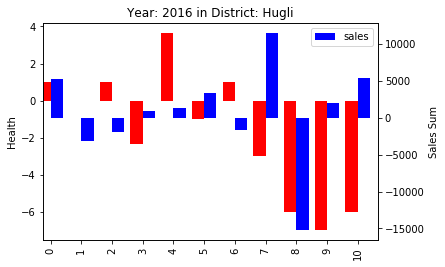

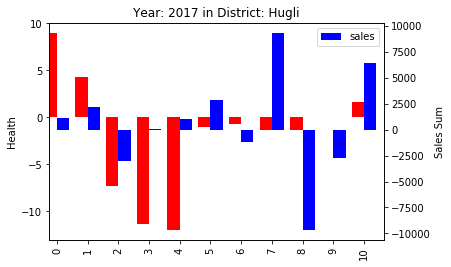

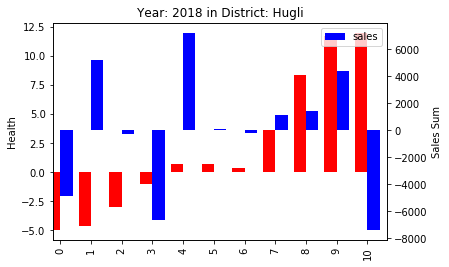

********************************************************************************
State: West Bengal District: Jalpaiguri


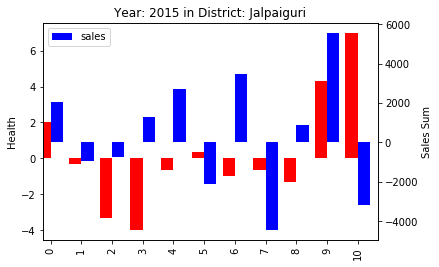

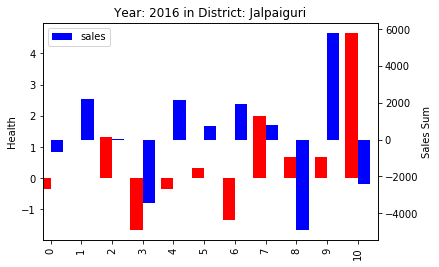

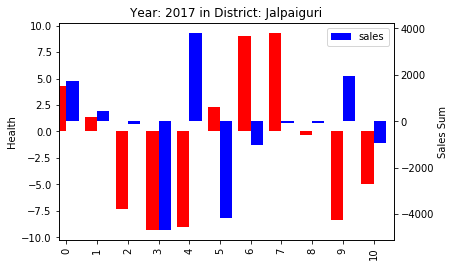

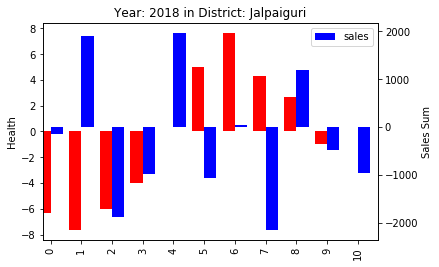

********************************************************************************
State: West Bengal District: Koch Bihar


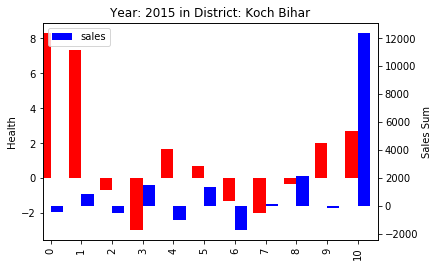

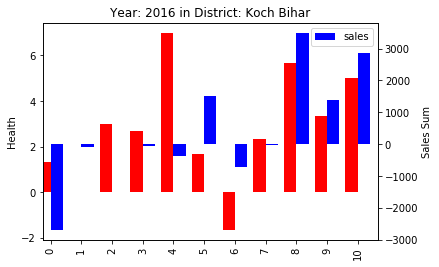

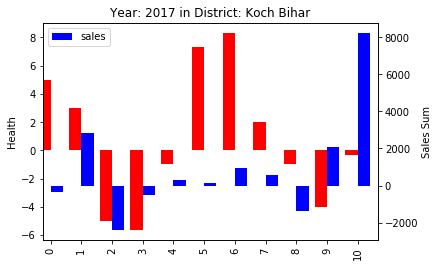

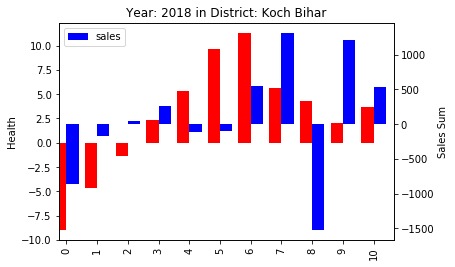

********************************************************************************
State: West Bengal District: Maldah


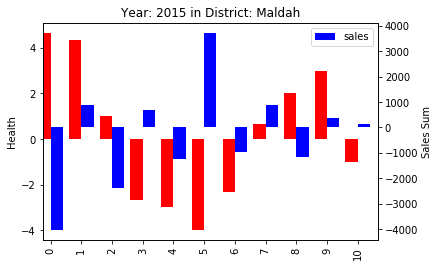

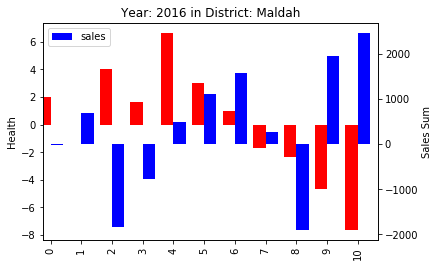

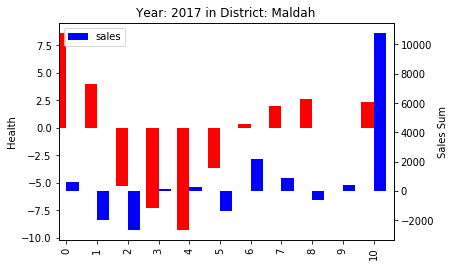

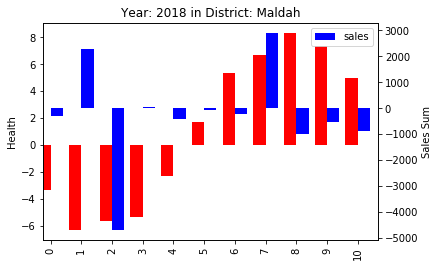

********************************************************************************
State: West Bengal District: Murshidabad


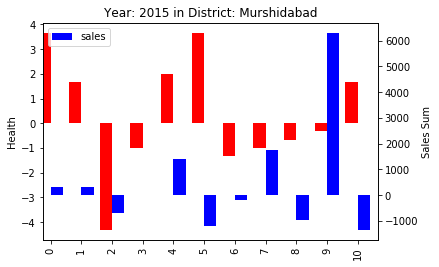

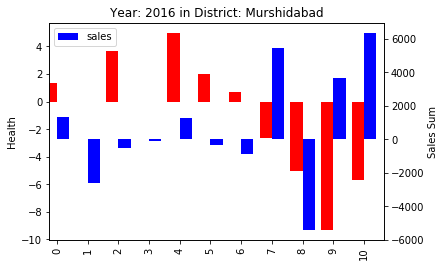

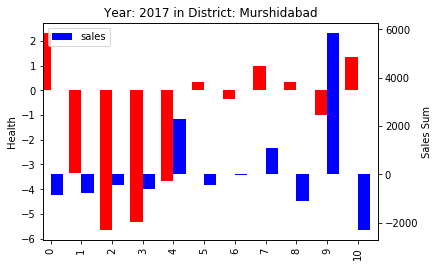

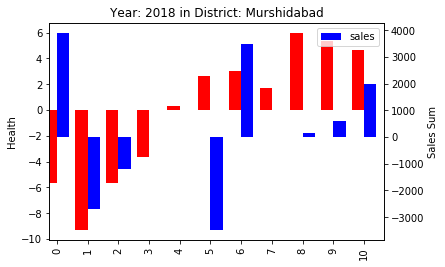

********************************************************************************
State: West Bengal District: Nadia


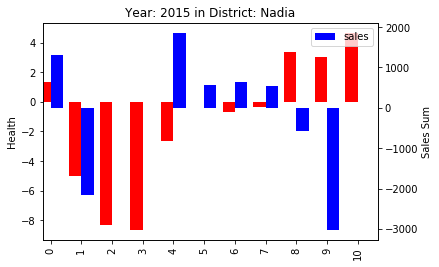

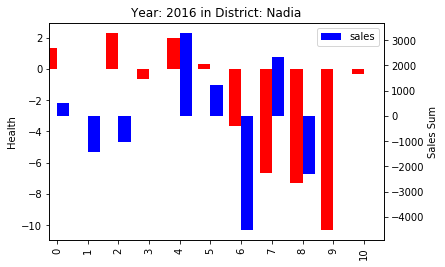

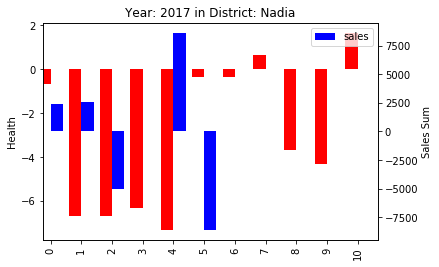

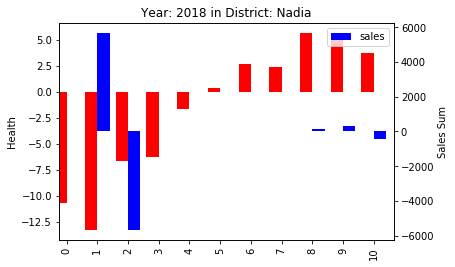

********************************************************************************
State: West Bengal District: North 24 Parganas


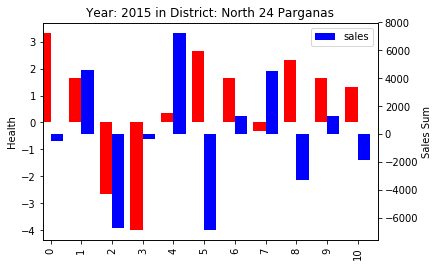

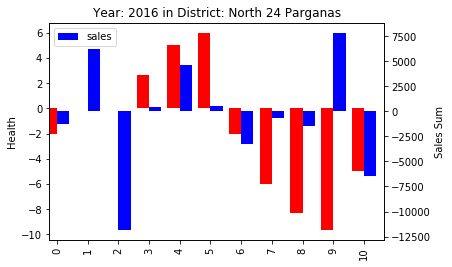

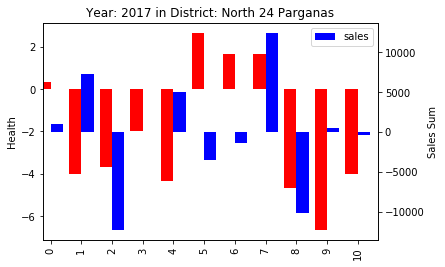

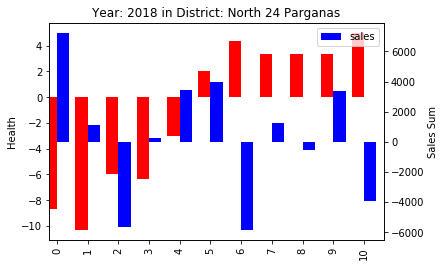

********************************************************************************
State: West Bengal District: Pashchim Medinipur


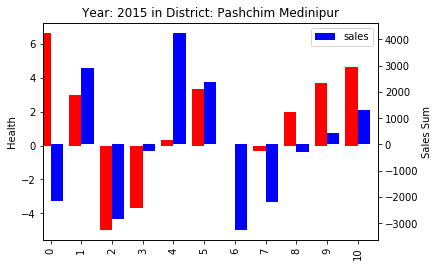

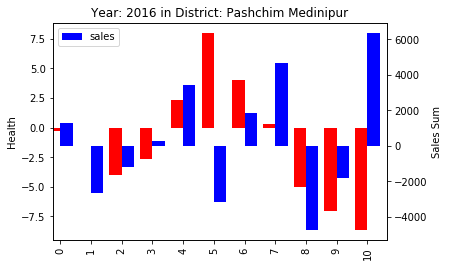

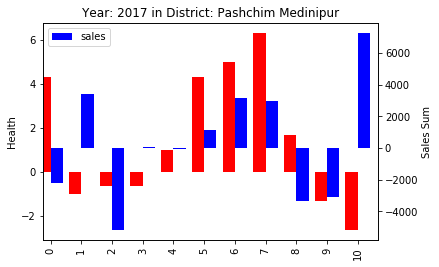

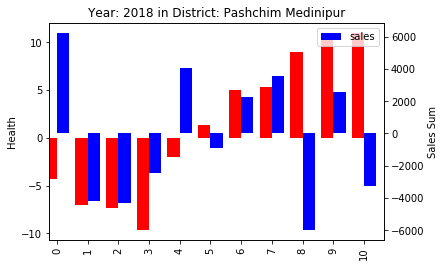

********************************************************************************
State: West Bengal District: Purba Medinipur


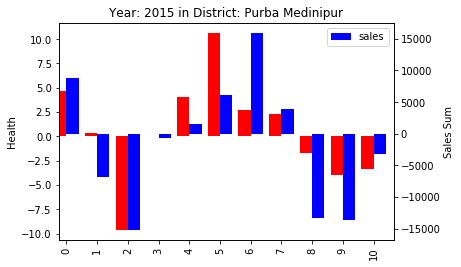

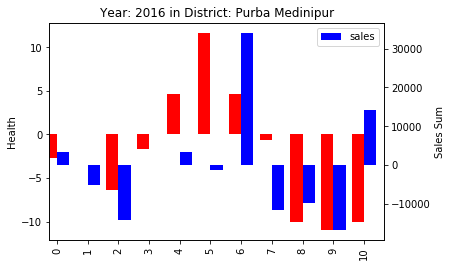

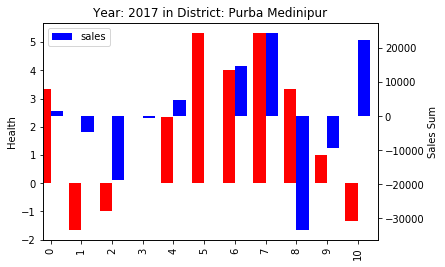

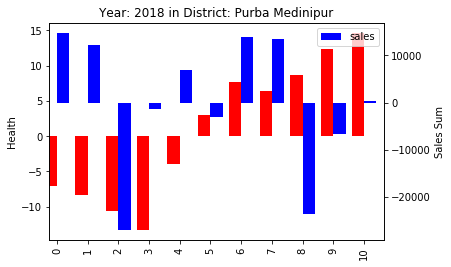

********************************************************************************
State: West Bengal District: Puruliya


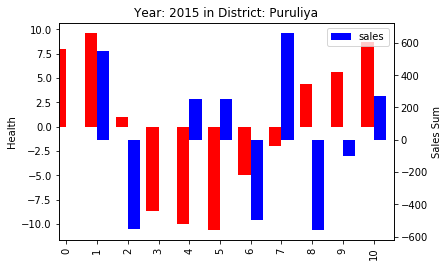

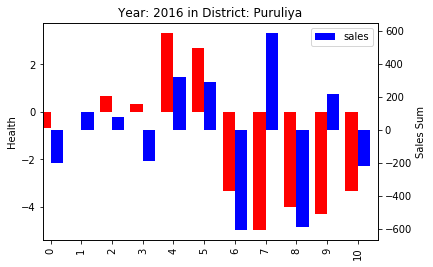

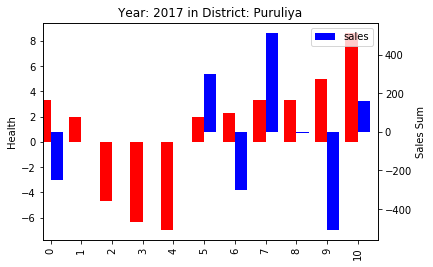

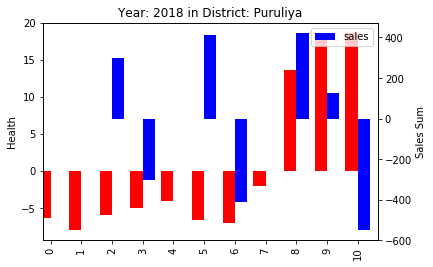

********************************************************************************
State: West Bengal District: South 24 Parganas


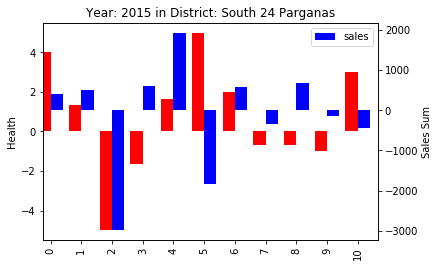

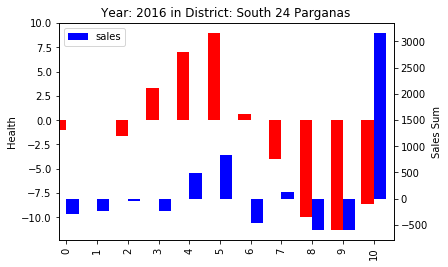

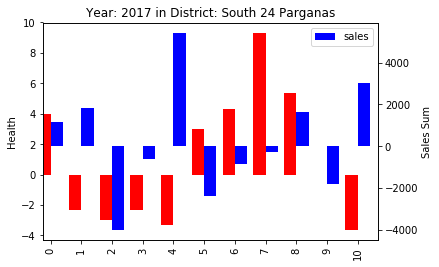

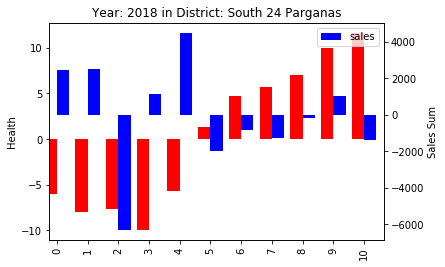

********************************************************************************
State: West Bengal District: Uttar Dinajpur


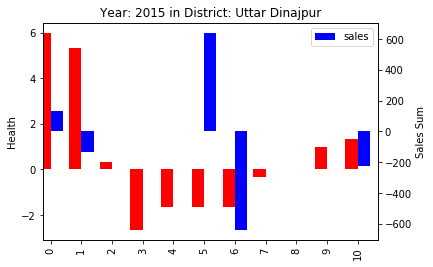

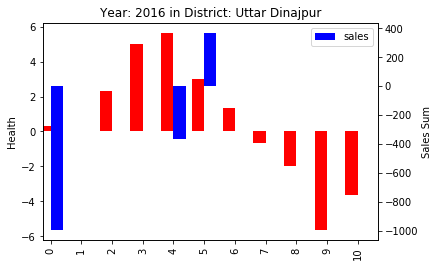

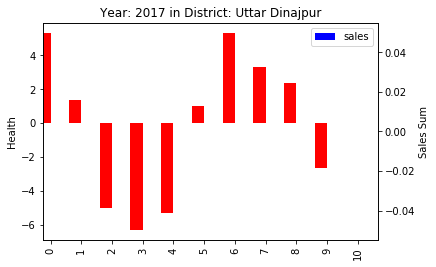

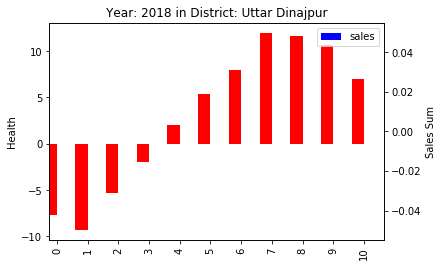

********************************************************************************


In [180]:
for j in ar_districts:
    first_year = 2015
    print("State: West Bengal District: "+j)
    for i in range(0,4):
        plot_year_area(first_year,j)
        first_year += 1
    print("**"*40)

In [181]:
mani_df = lat_long_district.loc[lat_long_district['State'] == 'Manipur']
mani_districts = np.unique(mani_df.District.values)

State: Manipur District: Imphal East


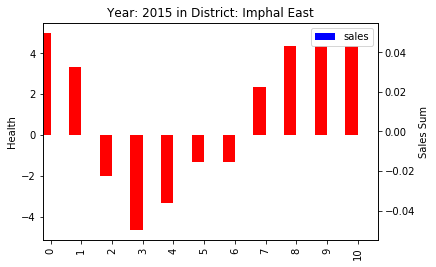

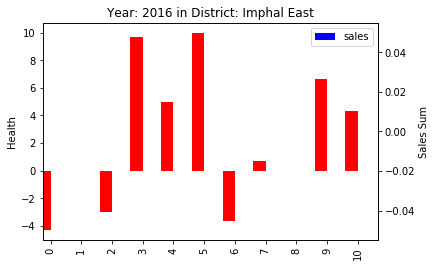

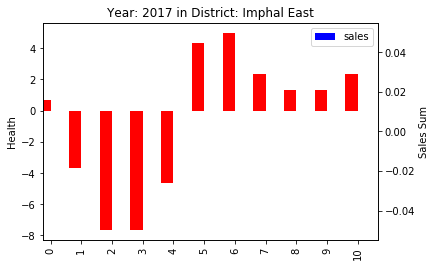

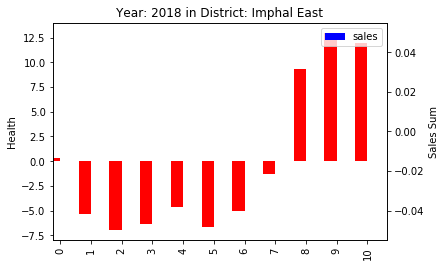

********************************************************************************


In [182]:
for j in mani_districts:
    first_year = 2015
    print("State: Manipur District: "+j)
    for i in range(0,4):
        plot_year_area(first_year,j)
        first_year += 1
    print("**"*40)